<a href="https://colab.research.google.com/github/shevaosyana/UTS_SIMULASI_DAN_PEMODELAN/blob/main/UTS_TEORI_%26_PRAKTIKUM_PEMODELAN_DAN_SIMULAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PREDIKSI KONDISI INFRASTRUKTUR JALAN DI KOTA SURABAYA MENGGUNAKAN MARKOV CHAIN



Prediksi Kondisi Jalan 2023-2025:
      Baik  Sedang  Rusak Ringan  Rusak Berat
2023  45.0    30.0          15.0         10.0
2024  37.5    30.2          20.1         12.2
2025  32.2    29.9          23.9         14.1
2026  28.3    29.3          26.7         15.7

Akurasi Model: 100.00%


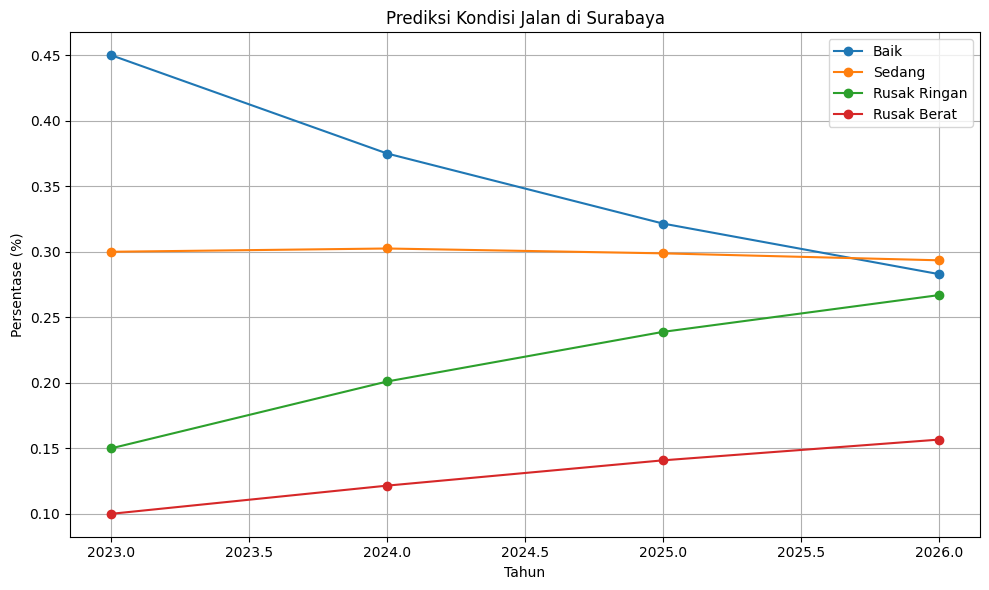

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class RoadConditionMarkov:
    def __init__(self):
        # Define states
        self.states = ['Baik', 'Sedang', 'Rusak Ringan', 'Rusak Berat']

        # Initialize transition matrix based on given data
        self.transition_matrix = np.array([
            [0.75, 0.20, 0.03, 0.02],  # Baik
            [0.10, 0.60, 0.20, 0.10],  # Sedang
            [0.05, 0.15, 0.65, 0.15],  # Rusak Ringan
            [0.00, 0.10, 0.30, 0.60]   # Rusak Berat
        ])

        # Initial state distribution for 2023
        self.initial_state = np.array([0.45, 0.30, 0.15, 0.10])

    def predict_future_states(self, years):
        """
        Predict road condition distribution for specified number of years
        """
        predictions = [self.initial_state]
        current_state = self.initial_state

        for _ in range(years):
            next_state = np.dot(current_state, self.transition_matrix)
            predictions.append(next_state)
            current_state = next_state

        return predictions

    def create_prediction_df(self, years):
        """
        Create a DataFrame with predictions
        """
        predictions = self.predict_future_states(years)
        years_list = range(2023, 2023 + len(predictions))

        df = pd.DataFrame(predictions,
                         columns=self.states,
                         index=years_list)
        return df

    def plot_predictions(self, predictions_df):
        """
        Plot the predictions
        """
        plt.figure(figsize=(10, 6))
        for state in self.states:
            plt.plot(predictions_df.index, predictions_df[state],
                    marker='o', label=state)

        plt.title('Prediksi Kondisi Jalan di Surabaya')
        plt.xlabel('Tahun')
        plt.ylabel('Persentase (%)')
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        return plt

    def calculate_accuracy(self, actual_data, predicted_data):
        """
        Calculate model accuracy by comparing predictions with actual data
        """
        differences = np.abs(actual_data - predicted_data)
        accuracy = 1 - np.mean(differences)
        return accuracy * 100

def main():
    # Initialize the model
    model = RoadConditionMarkov()

    # Generate predictions for next 3 years
    predictions_df = model.create_prediction_df(3)
    print("\nPrediksi Kondisi Jalan 2023-2025:")
    print(predictions_df.round(3) * 100)

    # Example of comparing with actual data for 2023
    actual_2023 = np.array([0.45, 0.30, 0.15, 0.10])
    predicted_2023 = predictions_df.loc[2023].values

    accuracy = model.calculate_accuracy(actual_2023, predicted_2023)
    print(f"\nAkurasi Model: {accuracy:.2f}%")

    # Plot the predictions
    plt = model.plot_predictions(predictions_df)
    plt.show()

if __name__ == "__main__":
    main()

In [ ]:
vcxdtbny[]